In [43]:
# Importing Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# The path to the CSV file
file = Path("Resources/Passengers_In_Out_Countries.csv")

# Reading the CSV file as a DataFrame
int_travel_df = pd.read_csv(file)
int_travel_df.head()


,Month,AustralianPort,ForeignPort,Country,Passengers_In,Passengers_Out,Passengers_Total,Year,Month_num
0,Jan-85,Adelaide,Auckland,New Zealand,1513,985,2498,1985,1
1,Jan-85,Adelaide,Bahrain,Bahrain,12,5,17,1985,1
2,Jan-85,Adelaide,Bombay,India,7,5,12,1985,1
3,Jan-85,Adelaide,Frankfurt,Germany,115,171,286,1985,1
4,Jan-85,Adelaide,London,UK,1567,1472,3039,1985,1


In [45]:
# Removing years that are before Year 2000, as we want to work on a dataset for years 2000-2022
int_travel_df = int_travel_df.loc[int_travel_df["Year"] >= 2000]

#Reorganising the columns
int_travel_df = int_travel_df [['Month', 'Year', 'Month_num', 'AustralianPort', 'Country','ForeignPort',  'Passengers_In',
       'Passengers_Out', ]]

In [46]:
# Looking at "Country" column and its components if they are unique 
unique_countries = int_travel_df["Country"].unique()

# Removing "Hong Kong" country duplicate
int_travel_df["Country"] = int_travel_df["Country"].replace("Hong Kong (SAR)", "Hong Kong")
unique_countries_corrected = int_travel_df["Country"].unique()
unique_countries_corrected


array(['USA', 'New Zealand', 'Thailand', 'India', 'Argentina',
       'Indonesia', 'Germany', 'Zimbabwe', 'Hong Kong', 'South Africa',
       'Malaysia', 'UK', 'Philippines', 'Fiji', 'Japan', 'Tahiti',
       'France', 'Papua New Guinea', 'Vanuatu', 'Italy', 'China',
       'Singapore', 'Taiwan', 'Canada', 'Switzerland', 'Western Samoa',
       'Brunei', 'Solomon Islands', 'Nauru', 'New Caledonia', 'Korea',
       'Guam', 'Greece', 'Bahrain', 'United Arab Emirates', 'Vietnam',
       'Luxembourg', 'Mauritius', 'Tonga', 'Austria', 'Netherlands',
       'Egypt', 'Sri Lanka', 'East Timor', 'American Samoa', 'Pakistan',
       'Chile', 'Niue', 'Ireland', 'Macau', 'Brazil', 'Cook Islands',
       'Kazakhstan', 'Marshall Islands', 'Qatar', 'Kenya', 'Nigeria',
       'Kiribati', 'Reunion', 'Turkey', 'Uruguay', 'Laos', 'Peru',
       'Cambodia'], dtype=object)

In [47]:
# Looking at "AustralianPort" column and its components if they are unique 
unique_aus_ports = int_travel_df["AustralianPort"].unique()

# Merging "Gold Coast" and "Gold Coast/Coolangatta" into one region
int_travel_df["AustralianPort"] = int_travel_df["AustralianPort"].replace("Gold Coast/Coolangatta", "Gold Coast")

# Checking
unique_aus_ports_corrected = int_travel_df["AustralianPort"].unique()
unique_aus_ports_corrected

array(['Adelaide', 'Brisbane', 'Cairns', 'Darwin', 'Gold Coast',
       'Melbourne', 'Norfolk Island', 'Perth', 'Sydney', 'Broome',
       'Townsville', 'Newcastle', 'Canberra', 'Christmas Island',
       'Port Hedland', 'Sunshine Coast', 'Toowoomba Wellcamp', 'Hobart'],
      dtype=object)

In [66]:
# Exporting int_travel_df into csv file
int_travel_df.to_csv("Output/int_travel.csv", index = False, header = True)


In [48]:
# Grouping the DataFrame by a Country and by a Year for "Passengers In" and "Passengers Out"
int_travel_df_grouped =  int_travel_df[["Country", "Year", "Passengers_In", "Passengers_Out"]]
int_travel_df_grouped = int_travel_df_grouped.groupby(["Country", "Year"]).sum()

# Resetting the index
int_travel_df_grouped  = int_travel_df_grouped.reset_index()
int_travel_df_grouped

,Country,Year,Passengers_In,Passengers_Out
0,American Samoa,2001,0,290
1,Argentina,2000,33996,34972
2,Argentina,2001,29961,31490
3,Argentina,2002,21145,21075
4,Argentina,2003,14470,14763
...,...,...,...,...
878,Western Samoa,2017,21373,21871
879,Western Samoa,2018,28219,30401
880,Western Samoa,2019,39761,38857
881,Western Samoa,2020,8096,6288


In [49]:
# Identifying the top five countries with the highest number of passengers to Australia

five_top_countries_in =  int_travel_df_grouped[["Country", "Passengers_In"]]
five_top_countries_in = five_top_countries_in.groupby(["Country"]).sum()
five_top_countries_in_sorted = five_top_countries_in.sort_values("Passengers_In", ascending = False)
top_five_in = five_top_countries_in_sorted.head()

print(f"The top five countries with the highest number of passengers to Australia in years 2000-2022 are: ")
for country in top_five_in.index:
    print(f"{country} with {top_five_in.loc[country, 'Passengers_In']} travellers.")

The top five countries with the highest number of passengers to Australia in years 2000-2022 are: 
New Zealand with 56200786 travellers.
Singapore with 44638374 travellers.
USA with 22805377 travellers.
United Arab Emirates with 20136412 travellers.
Hong Kong with 20094071 travellers.


In [50]:
#Creating separate DataFrames for the five most common countries visiting Australia by a year 

new_zealand_yearly_in = int_travel_df_grouped.loc[int_travel_df_grouped["Country"] == "New Zealand", 
                                               ["Country", "Year", "Passengers_In"]]
singapore_yearly_in = int_travel_df_grouped.loc[int_travel_df_grouped["Country"] == "Singapore", 
                                               ["Country", "Year", "Passengers_In"]]
usa_yearly_in = int_travel_df_grouped.loc[int_travel_df_grouped["Country"] == "USA", 
                                               ["Country", "Year", "Passengers_In"]]
emirates_yearly_in = int_travel_df_grouped.loc[int_travel_df_grouped["Country"] == "United Arab Emirates", 
                                               ["Country", "Year", "Passengers_In"]]
hongkong_yearly_in = int_travel_df_grouped.loc[int_travel_df_grouped["Country"] == "Hong Kong", 
                                               ["Country", "Year", "Passengers_In"]]


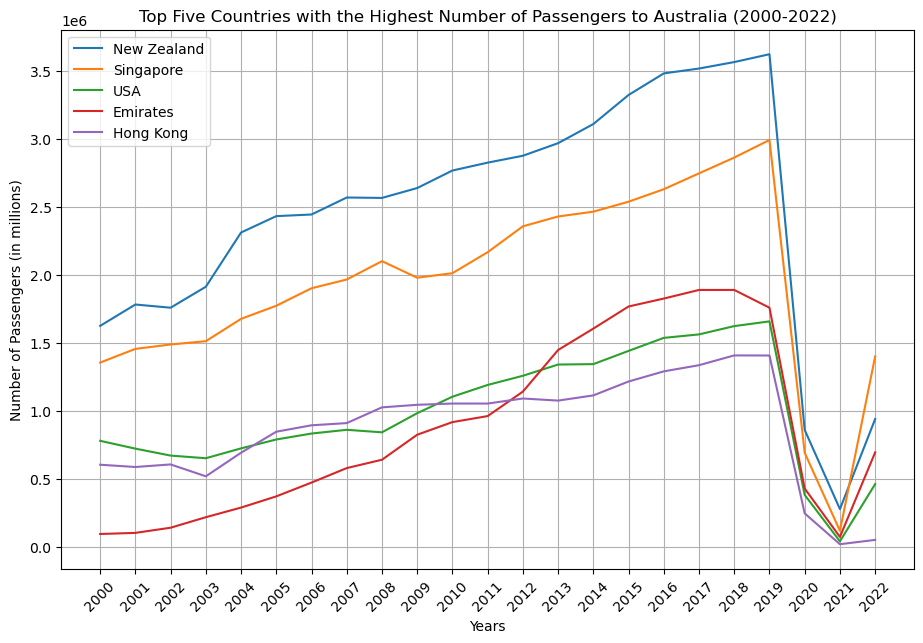

In [51]:
# Creating a plot chart showing the top five countries with the highest number of passengers to Australia in years 2000-2022

plt.figure(figsize=(11,7))
plt.plot(new_zealand_yearly_in["Year"], new_zealand_yearly_in["Passengers_In"], label = "New Zealand")
plt.plot(singapore_yearly_in["Year"], singapore_yearly_in["Passengers_In"], label = "Singapore")
plt.plot(usa_yearly_in["Year"], usa_yearly_in["Passengers_In"], label = "USA")
plt.plot(emirates_yearly_in["Year"], emirates_yearly_in["Passengers_In"], label = "Emirates")
plt.plot(hongkong_yearly_in["Year"], hongkong_yearly_in["Passengers_In"], label = "Hong Kong")

# Customizing the plot chart
plt.title('Top Five Countries with the Highest Number of Passengers to Australia (2000-2022)')
plt.xticks(np.arange(min(new_zealand_yearly_in["Year"]), max(new_zealand_yearly_in["Year"])+1, 1), rotation=45) 
plt.ylabel("Number of Passengers (in millions)")
plt.xlabel("Years")
plt.grid()
plt.legend(loc="best")
plt.savefig("Output/Chart1.png")
plt.show()

In [52]:
# Identifying the top five countries with the highest number of passengers from Australia

five_top_countries_out =  int_travel_df_grouped[["Country", "Passengers_Out"]]
five_top_countries_out = five_top_countries_out.groupby(["Country"]).sum()
five_top_countries_out_sorted = five_top_countries_out.sort_values("Passengers_Out", ascending = False)
five_top_countries_out_sorted.head()
top_five_out = five_top_countries_out_sorted.head()

print(f"The top five countries with the highest number of passengers from Australia in years 2000-2022 are: ")
for country in top_five_out.index:
    print(f"{country} with {top_five_out.loc[country, 'Passengers_Out']} travellers.")

The top five countries with the highest number of passengers from Australia in years 2000-2022 are: 
New Zealand with 56494978 travellers.
Singapore with 43025303 travellers.
USA with 22931653 travellers.
United Arab Emirates with 19808116 travellers.
Hong Kong with 19452374 travellers.


In [53]:
#Creating separate DataFrames for the five most common countries visited by Australians by a year 

new_zealand_yearly_out = int_travel_df_grouped.loc[int_travel_df_grouped["Country"] == "New Zealand", 
                                               ["Country", "Year", "Passengers_Out"]]
singapore_yearly_out = int_travel_df_grouped.loc[int_travel_df_grouped["Country"] == "Singapore", 
                                               ["Country", "Year", "Passengers_Out"]]
usa_yearly_out = int_travel_df_grouped.loc[int_travel_df_grouped["Country"] == "USA", 
                                               ["Country", "Year", "Passengers_Out"]]
emirates_yearly_out = int_travel_df_grouped.loc[int_travel_df_grouped["Country"] == "United Arab Emirates", 
                                               ["Country", "Year", "Passengers_Out"]]
hongkong_yearly_out = int_travel_df_grouped.loc[int_travel_df_grouped["Country"] == "Hong Kong", 
                                               ["Country", "Year", "Passengers_Out"]]


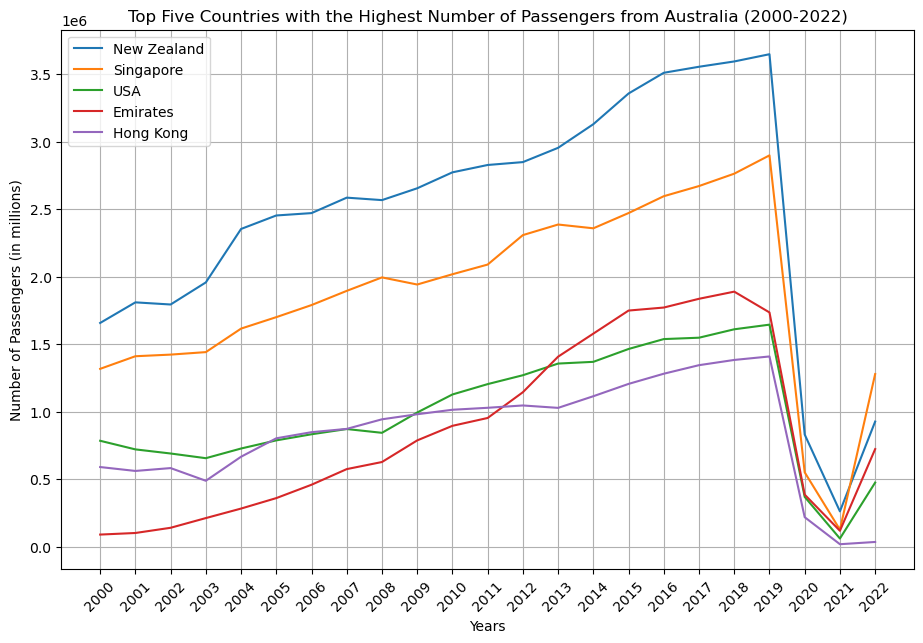

In [54]:
# Creating a plot chart showing the top five countries with the highest number of passengers from Australia in years 2000-2022

plt.figure(figsize=(11,7))
plt.plot(new_zealand_yearly_out["Year"], new_zealand_yearly_out["Passengers_Out"], label = "New Zealand")
plt.plot(singapore_yearly_out["Year"], singapore_yearly_out["Passengers_Out"], label = "Singapore")
plt.plot(usa_yearly_out["Year"], usa_yearly_out["Passengers_Out"], label = "USA")
plt.plot(emirates_yearly_out["Year"], emirates_yearly_out["Passengers_Out"], label = "Emirates")
plt.plot(hongkong_yearly_out["Year"], hongkong_yearly_out["Passengers_Out"], label = "Hong Kong")

# Customizing the plot chart
plt.title('Top Five Countries with the Highest Number of Passengers from Australia (2000-2022)')
plt.xticks(np.arange(min(new_zealand_yearly_out["Year"]), max(new_zealand_yearly_out["Year"])+1, 1), rotation=45) 
plt.ylabel("Number of Passengers (in millions)")
plt.xlabel("Years")
plt.grid()
plt.legend(loc="best")
plt.savefig("Output/Chart2.png")

plt.show()

In [55]:
# ANALYSIS

# The top five countries with the highest number of passengers both "to" and "from" Australia in years 2000-2022 are:
# New Zealand, Singapore, USA, United Arab Emirates and Hong Kong. 
# New Zealand is geographically close to Australia and they have a long history of free movement between each other.
# A significant number of New Zealand citizens live and work in Australia, but also visit for turism purposes. 
# Singapore, United Arab Emirates and Hong Kong - those three countries are major transit hubs for international travel.
# Singapore's Changi Airport and UAE's Dubai International Airport are among the busiest airports in the world. 
# There is also significant business and tourism travel between Hong Kong and Australia.
# USA - There are stong business, family and tourism links between the USA and Australia. Also, there are direct long-haul
# flights available between those two countries. 

# From 2000 to 2011, the countries with the highest number of passengers to and from Australia maintained a consistent order.
# However, a shift occurred in the hierarchy after 2011. Starting from the middle of 2011, there was a raise in passenger 
# numbers involving the United Arab Emirates. This rise was significant enough to first surpass Hong Kong and then later 
# the USA. It might be attributed to the aggressive expansion of Emirates airline during that period. 

# The significant decline in passengers during the years 2019-2021 is largely attributable to the global COVID-19 pandemic.
# As the virus spread around the world in early 2020, many countries, including Australia, imposed stringent travel 
# restrictions to contain the spread of the virus. 
# The slight rise in passenger numbers in 2021 is due to the roll-out of COVID-19 vaccines and a subsequent easing of travel
# restrictions in many countries.



In [56]:
# Investigating the seasonal patterns in travel to and from Australia by month for years 2000-2022

# Adjusting the "Month_num" values to corresponsing months

months_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
int_travel_df['Month_num'] = int_travel_df['Month_num'].replace(months_dict)

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
          'November', 'December']

int_travel_df['Month_num'] = pd.Categorical(int_travel_df['Month_num'], categories=months, ordered=True)

# Grouping the data by month and calculating the average number of passangers coming into Australia
monthly_averages_in = int_travel_df.groupby("Month_num")[["Passengers_In"]].mean()

# Grouping the data by month and calculating the average number of passangers flying from Australia
monthly_averages_out = int_travel_df.groupby("Month_num")[["Passengers_Out"]].mean()

#Merging the data into one DataFrame
monthly_averages_in_out = pd.merge(monthly_averages_in, monthly_averages_out, on="Month_num")


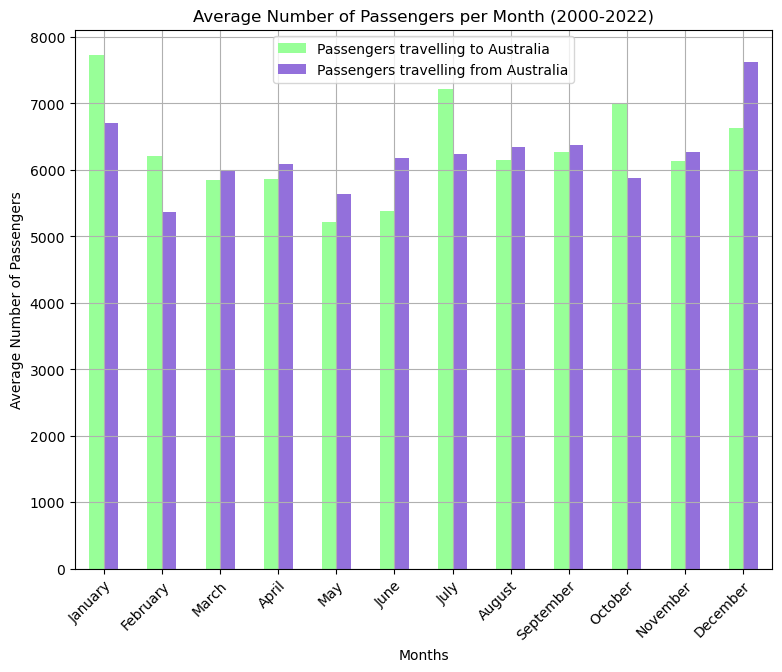

<Figure size 640x480 with 0 Axes>

In [63]:
# Creating a bar chart
figure1 = monthly_averages_in_out.plot(kind="bar", color=["#98ff98", "#9370DB"], figsize=(9,7),
                                   title="Average Number of Passengers per Month (2000-2022)")

figure1.set_xlabel("Months")
figure1.set_ylabel("Average Number of Passengers")
xticklabels = monthly_averages_in_out.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)
figure1.legend(["Passengers travelling to Australia", "Passengers travelling from Australia"], loc ="best")
plt.grid()
plt.savefig("Output/Chart3.png")
plt.show()
plt.tight_layout()




In [58]:
# ANALYSIS

# PASSENGERS VISTING AUSTRALIA
# The most  popular months to visit Australia are January (average 7726), July (average 7214) and October (average 6986).
# In Australia, January is the height of summer, which is ideal for outdoor activities and beach visits. On 26th January 
# there is Australia Day, which brings a lot of events through the country. July is a great month to visit Northern Australia,
# as it is not as hot and hummid as in the summer and for many people from Europe and North Amercia, July is their summer
# holiday, so there is increase in travel.
# In October, Australia is in spring and there are significant events  like the AFL and NRL Grand Finals. 
# The least popular months to visit Australia are May (average 5223) and June (average 5382). It is mostly because
# those months are cooler (early winter season) and there is a higher likelihood of rains. There are no major events
# happening at those times or school holidays. It is also spring and early summer for northern hemisphere countries,
# so people most likely will stay within that hemisphere. 


# PASSENGERS FROM AUSTRALIA
# The most popular months for passangers to leave Australia are December (average 7628) and January (average 6705).
# This might be due to: Christmas and New Years holidays. It is also the time of the summer school holidays. Some people 
# might travel to Europe and North America to experience "white" Christmas and ski season.
# The least popular are Feburary (average 5374) and May (average 5641). February is often a time when people are getting 
# back to work or school after holidays. May marks the beginning of autumn in Australia.


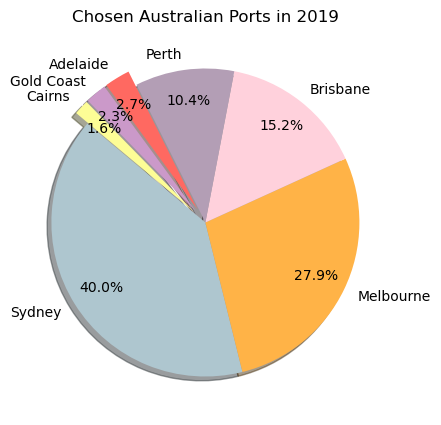

In [72]:
# Identifying the most popular Australian Ports within passengers coming to Australia in year 2019 (before Covid-19) 
# and in year 2022 (after Covid-19)

# Performing calculations for year 2019
australian_ports_2019 = int_travel_df.loc[int_travel_df["Year"] == 2019]
australian_ports_2019 = australian_ports_2019[["AustralianPort", "Passengers_In"  ]]
australian_ports_2019 = australian_ports_2019.groupby(["AustralianPort"]).sum().reset_index()
australian_ports_2019= australian_ports_2019.sort_values("Passengers_In", ascending = False)
australian_ports_2019_top_seven = australian_ports_2019.head(7)

# Generating a pie chart
pastel_colors = ["#AEC6CF", "#FFB347", "#FFD1DC", "#B39EB5", "#FF6961", 
                 "#CB99C9", "#FDFD96"]
explode = (0, 0, 0, 0, 0.1, 0.1, 0.1)
plt.figure(figsize=(5,5))
plt.pie(australian_ports_2019_top_seven["Passengers_In"], labels=australian_ports_2019_top_seven["AustralianPort"], 
        colors=pastel_colors, explode=explode, autopct="%1.1f%%", pctdistance=0.8,  shadow=True, startangle=140)


plt.title('Chosen Australian Ports in 2019')
plt.savefig("Output/Chart4.png")
plt.show()


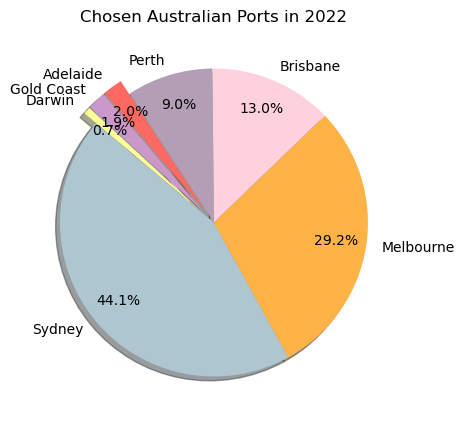

In [73]:
# Identifying the most popular Australian Ports within passengers coming to Australia in year 2019 (before Covid-19) 
# and in year 2022 (after Covid-19)

# Performing calculations for year 2022
australian_ports_2022 = int_travel_df.loc[int_travel_df["Year"] == 2022]

australian_ports_2022 = australian_ports_2022[["AustralianPort", "Passengers_In"]]
australian_ports_2022 = australian_ports_2022.groupby(["AustralianPort"]).sum().reset_index()
australian_ports_2022= australian_ports_2022.sort_values("Passengers_In", ascending = False)
australian_ports_2022_top_seven = australian_ports_2022.head(7)

# Generating a pie chart
pastel_colors = ["#AEC6CF", "#FFB347", "#FFD1DC", "#B39EB5", "#FF6961", 
                 "#CB99C9", "#FDFD96"]

explode = (0, 0, 0, 0, 0.1, 0.1, 0.1)
plt.figure(figsize=(5,5))
plt.pie(australian_ports_2022_top_seven["Passengers_In"], labels=australian_ports_2022_top_seven["AustralianPort"], 
        colors=pastel_colors, explode=explode, autopct="%1.1f%%", pctdistance=0.8,  shadow=True, startangle=140)


plt.title('Chosen Australian Ports in 2022')
plt.savefig("Output/Chart5.png")
plt.show()


In [61]:
# ANALYSIS

# it appears that from 2019 to 2022, the popularity of different Australian ports has experienced some shifts.
#The percentages of passengers coming into Australia through Sydney and Melbourne have slightly increased, 
# while the percentages of passengers coming into Brisbane, Perh, Adelaide, Gold Coast and Cairns have slightly decreased. 
#These changes might be due to changes in travel preferences, economic factors or the efects of the COVID-19 pandemic. 
